<a href="https://colab.research.google.com/github/jaymalak/Capstone1/blob/master/Capstone_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Fetched for MYSQL and CSV

In [6]:
!pip install mysql.connector

     |████████████████████████████████| 11.9MB 5.0MB/s 
  Created wheel for mysql.connector: filename=mysql_connector-2.2.9-cp36-cp36m-linux_x86_64.whl size=247949 sha256=8f7c3017df653be37c2a68a33c177b639c5d7a1a43e2c80bfb61addea8d4e9c6
  Stored in directory: /root/.cache/pip/wheels/8c/83/a1/f8b6d4bb1bd6208bbde1608bbfa7557504bed9eaf2ecf8c175
Successfully built mysql.connector


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline

In [0]:
from mysql.connector import Error

In [0]:
import mysql.connector

In [43]:
try:
   connection = mysql.connector.connect(host='cpanel.insaid.co', database='Capstone1', user='student',password='student')

   if connection.is_connected():
     db_info = connection.get_server_info()
     print("connected to MySQ Server version", db_info)
     sql_gender_age = "select * from gender_age_train"
     sql_ph_brand = "select * from phone_brand_device_model"
    
     cursor = connection.cursor()
     cursor.execute(sql_gender_age)
     record = cursor.fetchall()
     gender_age_train = pd.DataFrame(record)
     
     cursor.execute(sql_ph_brand)
     record1 = cursor.fetchall()
     phone_brand = pd.DataFrame(record1)

 
except Error as e :
  print ("Error while connecting  to MySQL", e)

finally :
  if (connection.is_connected()) :
    cursor.close()
    connection.close()
    print("MySQL connection is closed")

connected to MySQ Server version 5.6.46-cll-lve
MySQL connection is closed


In [32]:
connection

In [45]:
gender_age_train.head()

,0,1,2,3
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [38]:
phone_brand.head()

,0,1,2
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [47]:
gender_age_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
0    74645 non-null int64
1    74645 non-null object
2    74645 non-null int64
3    74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [39]:
phone_brand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
0    87726 non-null int64
1    87726 non-null object
2    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [48]:
gender_age_train.shape

(74645, 4)

In [42]:
phone_brand.shape

(87726, 3)

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [52]:
link = 'https://drive.google.com/open?id=1ggM3ZXElSob6ZSzWaiNNT3SgiNDHGv6d' # The shareable link
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1ggM3ZXElSob6ZSzWaiNNT3SgiNDHGv6d


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('events.csv')  
events = pd.read_csv('events.csv')

In [0]:
pd.set_option('float_format', '{:f}'.format)

In [69]:
events.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,1.000000,29182687948017176.000000,2016-05-01 00:55:25,77.266049,28.681610,Delhi,Delhi
1,7104.000000,29182687948017176.000000,2016-05-02 09:37:02,77.266049,28.681610,Delhi,Delhi
2,29661.000000,29182687948017176.000000,2016-05-04 00:56:04,77.266049,28.681610,Delhi,Delhi
3,33133.000000,29182687948017176.000000,2016-05-06 05:01:15,77.266049,28.681610,Delhi,Delhi
4,38980.000000,29182687948017176.000000,2016-05-06 09:55:04,77.266049,28.681610,Delhi,Delhi


In [55]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     float64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(4), object(3)
memory usage: 173.7+ MB


In [0]:
gender_age_train.columns=['device_id','gender','age','age_group']

In [61]:
gender_age_train.head()

,device_id,gender,age,age_group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [0]:
phone_brand.columns=['device_id','brand','model']

In [64]:
phone_brand.head()

,device_id,brand,model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [67]:
gender_age_train.groupby(by='age_group')

In [70]:
#missing data in gender_age_train
total = gender_age_train.isnull().sum().sort_values(ascending=False)
percent = (gender_age_train.isnull().sum()/gender_age_train.isnull().count()).sort_values(ascending=False)
missing_data_genderage = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_genderage.head(20)
print(missing_data_genderage)


           Total  Percent
age_group      0 0.000000
age            0 0.000000
gender         0 0.000000
device_id      0 0.000000


In [71]:
##missing data in phone_brand
total = phone_brand.isnull().sum().sort_values(ascending=False)
percent = (phone_brand.isnull().sum()/phone_brand.isnull().count()).sort_values(ascending=False)
missing_data_phoneband = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_phoneband.head(20)
print(missing_data_phoneband)


           Total  Percent
model          0 0.000000
brand          0 0.000000
device_id      0 0.000000


In [72]:
##missing data in events
total = events.isnull().sum().sort_values(ascending=False)
percent = (events.isnull().sum()/events.isnull().count()).sort_values(ascending=False)
missing_data_events = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_events.head(20)
print(missing_data_events)

           Total  Percent
device_id    453 0.000139
latitude     423 0.000130
longitude    423 0.000130
state        377 0.000116
city           0 0.000000
timestamp      0 0.000000
event_id       0 0.000000


Text(0, 0.5, 'Count')

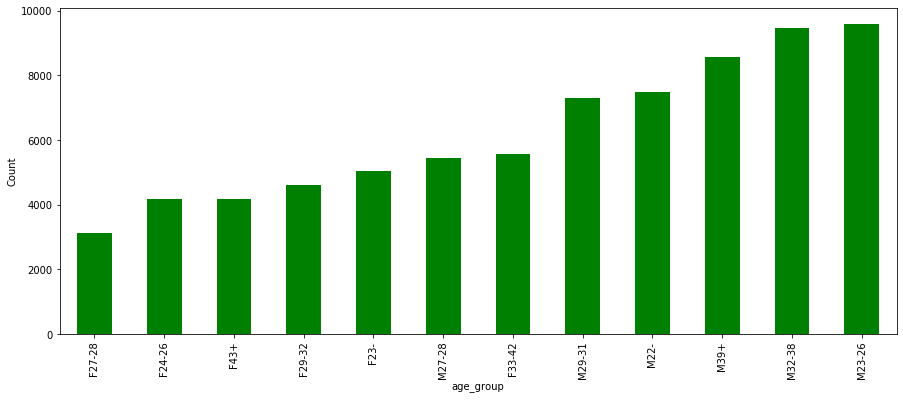

In [95]:
plt.figure(figsize = (15, 6))
gender_age_train.groupby('age_group')['age'].count().sort_values(ascending=True).plot(kind='bar', color='g')
plt.ylabel('Count')


Text(0, 0.5, 'Count')

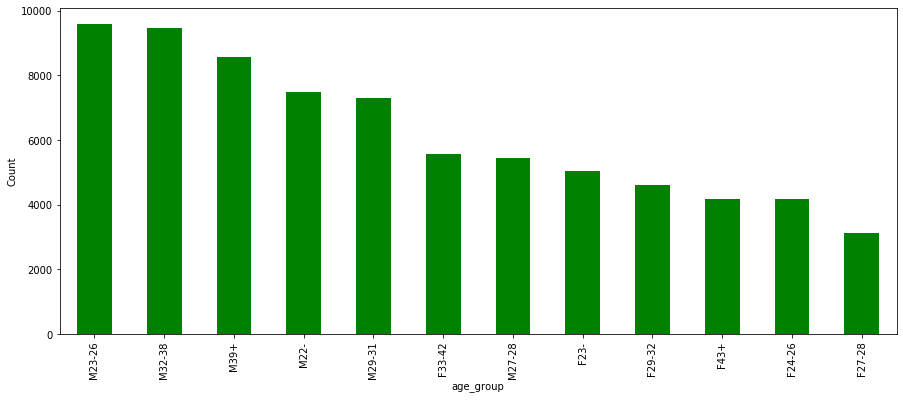

In [94]:
plt.figure(figsize = (15, 6))
gender_age_train.groupby('age_group')['device_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

In [101]:
phone_brand.groupby('model')['device_id'].count().sort_values(ascending=False).head(20)

model
红米note           3500
MI 3             2739
MI 2S            2547
Galaxy Note 3    2378
MI 4             2256
Galaxy S4        1910
Galaxy Note 2    1877
荣耀6              1471
荣耀畅玩4X           1279
荣耀3C             1206
红米1S             1191
红米               1168
Galaxy S3        1156
Mate 7           1125
魅蓝NOTE           1026
红米2               941
红米Note2           903
MX3               842
Galaxy S5         827
荣耀6 Plus          815
Name: device_id, dtype: int64

Text(0, 0.5, 'Count')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 31859 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 33635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32768 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 30021 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 29609 missing from current font.
  font.set_

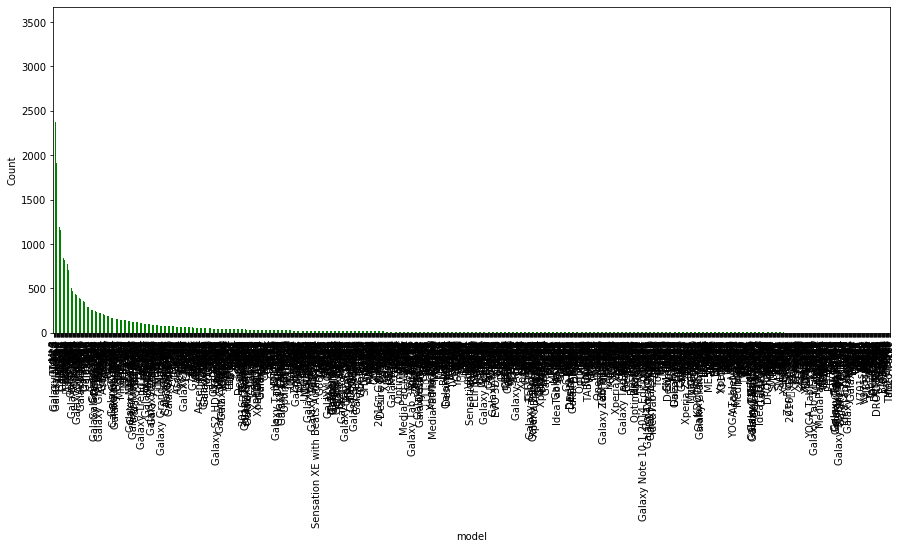

In [97]:
plt.figure(figsize = (15, 6))
phone_brand.groupby('model')['device_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')

##Observations :
  1. Gender_age_train
     1.1  NULL values not found
  2. Phone_band
     2.1 NULL values not found
  3. events
     3.1 Few Values found missing. Device_id = 453, Latitude = 423,Longitude=42,         state 377
         

In [82]:
gcount = gender_age_train.groupby('age')['age'].count().sort_values(ascending=True)
gcount.head()

age
1     1
90    1
94    1
96    1
84    2
Name: age, dtype: int64

In [90]:
gage=gender_age_train.groupby(['age_group','age'])['device_id'].count()
gage.head()

age_group  age
F23-       10      2
           11      4
           12      5
           13      5
           14     14
Name: device_id, dtype: int64

Text(0, 0.5, 'Count')

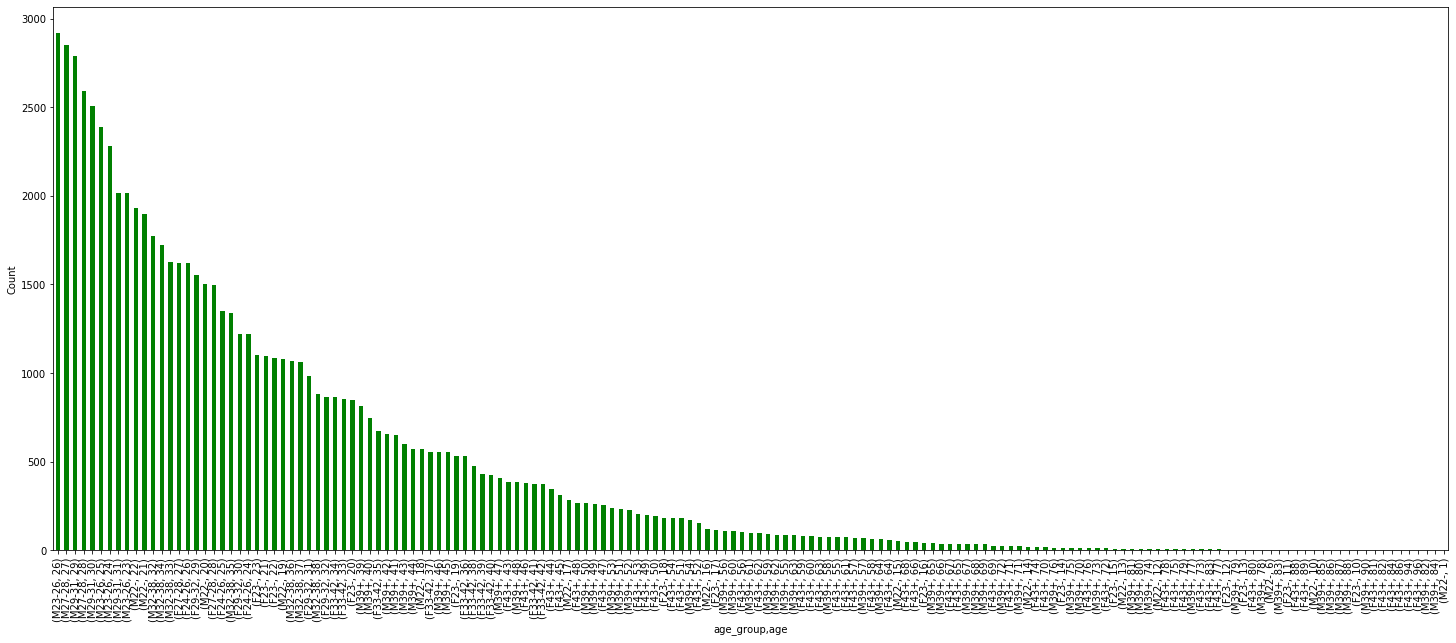

In [92]:
plt.figure(figsize = (25, 10))
gender_age_train.groupby(['age_group','age'])['device_id'].count().sort_values(ascending=False).plot(kind='bar', color='g')
plt.ylabel('Count')